# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [402]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [403]:
# Read in the data set
df = pd.read_csv("ames.csv")
df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


<Axes: >

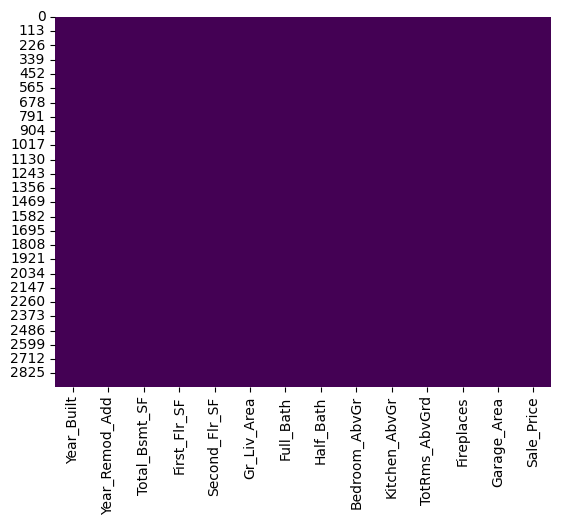

In [404]:
# Clean and pre-process the data if neccessary
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")


                Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  \
Year_Built        1.000000        0.612095       0.407764      0.310463   
Year_Remod_Add    0.612095        1.000000       0.298393      0.242108   
Total_Bsmt_SF     0.407764        0.298393       1.000000      0.800429   
First_Flr_SF      0.310463        0.242108       0.800429      1.000000   
Second_Flr_SF     0.016828        0.158939      -0.204487     -0.250057   
Gr_Liv_Area       0.241726        0.316855       0.445108      0.562166   
Full_Bath         0.469406        0.457266       0.325434      0.371584   
Half_Bath         0.269268        0.211771      -0.054557     -0.104203   
Bedroom_AbvGr    -0.055093       -0.021536       0.052721      0.106648   
Kitchen_AbvGr    -0.137852       -0.142404      -0.038612      0.076025   
TotRms_AbvGrd     0.111919        0.197528       0.281627      0.390162   
Fireplaces        0.170672        0.133322       0.333467      0.406345   
Garage_Area       0.48072

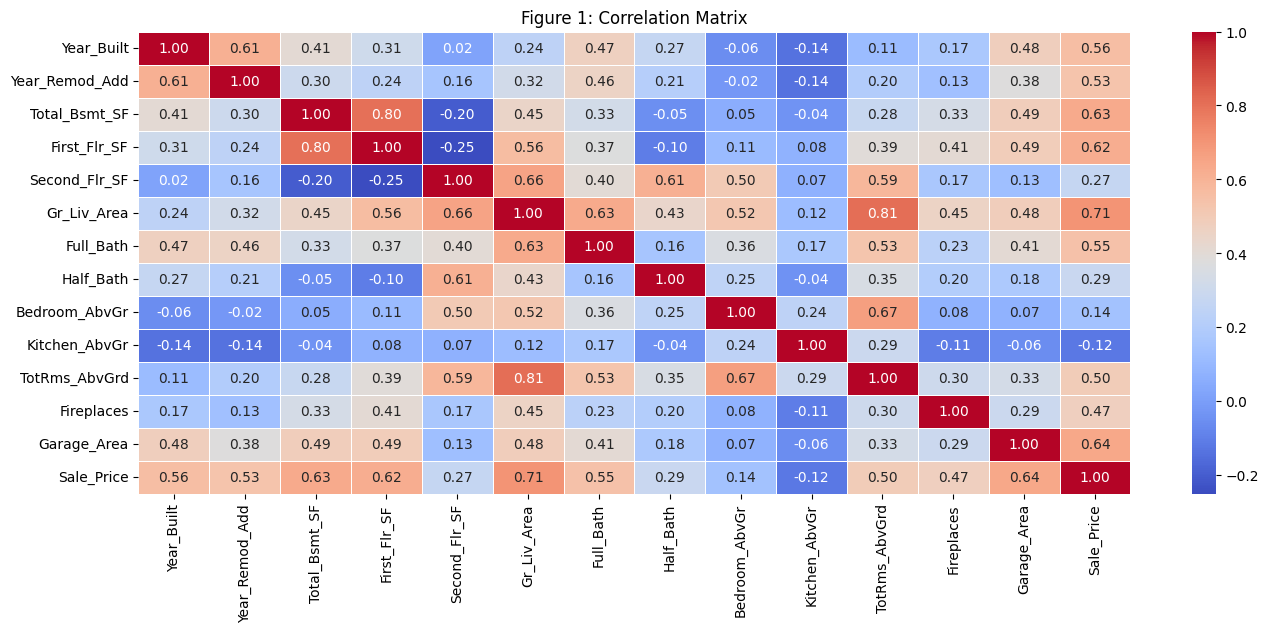

In [405]:
# Explore the data with visualisations such as histograms and correlation matrices
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(16,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Figure 1: Correlation Matrix")
plt.show()

Figure 1, the correlation matrix, is a fantastic way to see how strong the correlations are between variables. 0 Inidcating no linear relationaship, -1 being a negative relationship, as the one variable goes up the other will go down. From this matrix we can see that Garage_Area (0.64) and Gr_Liv_Are (0.71) had the strongest correlation with Sales_Price (dependant variable). 

Also noticed that total above grade rooms and the size of the above grade living area in square foot has the strongest linear relationship at 0.81. This positive relationship can be seen in figure 2.

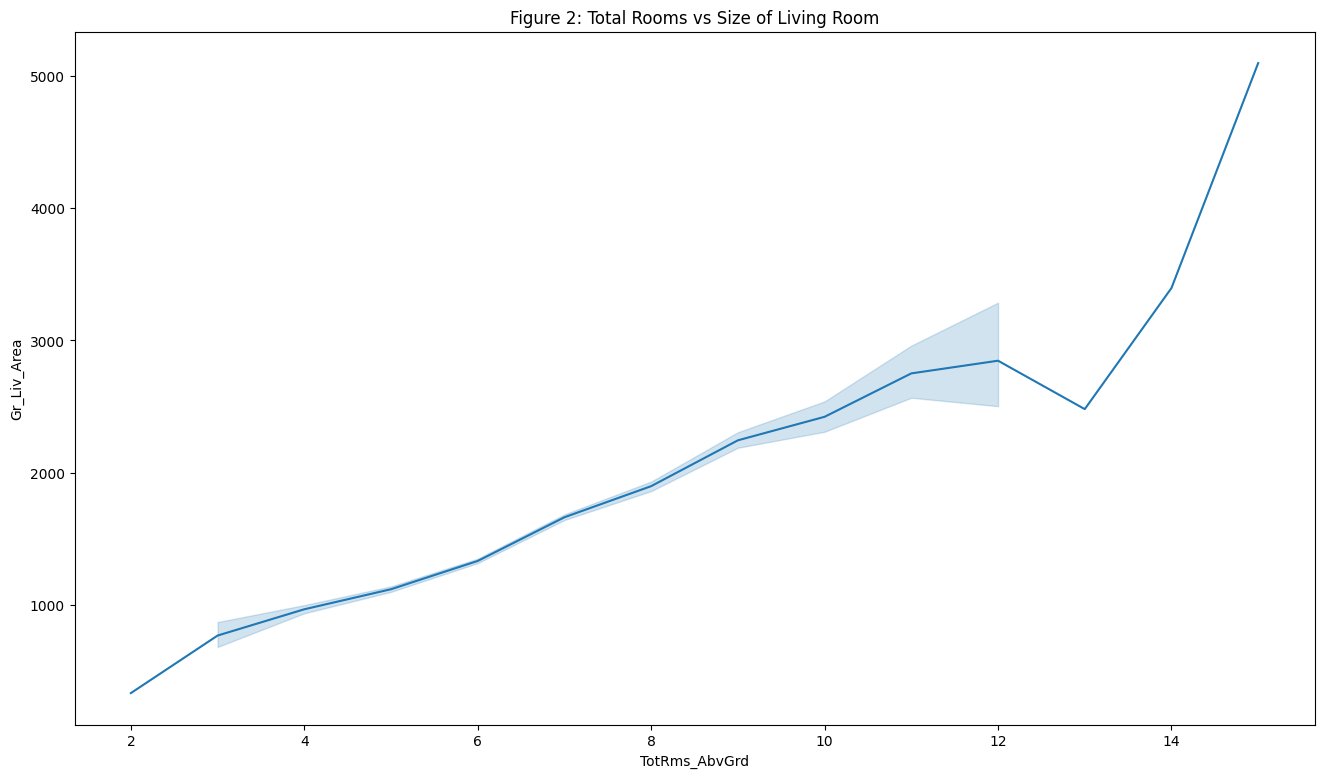

In [406]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df, x="TotRms_AbvGrd", y="Gr_Liv_Area")
plt.title("Figure 2: Total Rooms vs Size of Living Room")
plt.show()

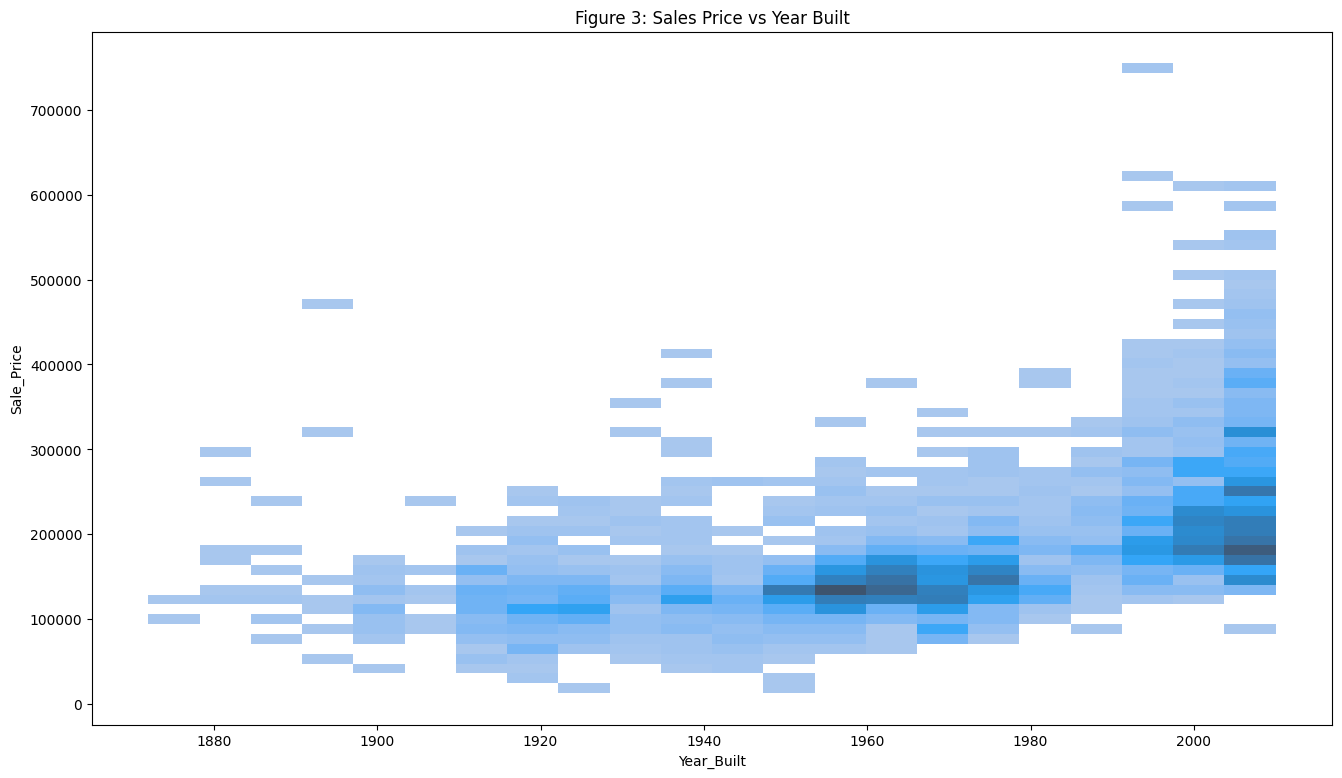

In [407]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x="Year_Built", y="Sale_Price")
plt.title("Figure 3: Sales Price vs Year Built")
plt.show()

Figure 3 displays the relationship between the year a house was built vs the sales price. We can see that houses are becoming more expensive as the "younger" it is. In the 2000s the number of houses being sold between 2006 and 2010, picked up and this can probably be as a result of the resession.

In [408]:
# Split the independent variables from the dependent variable
X = df[["Gr_Liv_Area", "Garage_Area"]]
y = df["Sale_Price"]

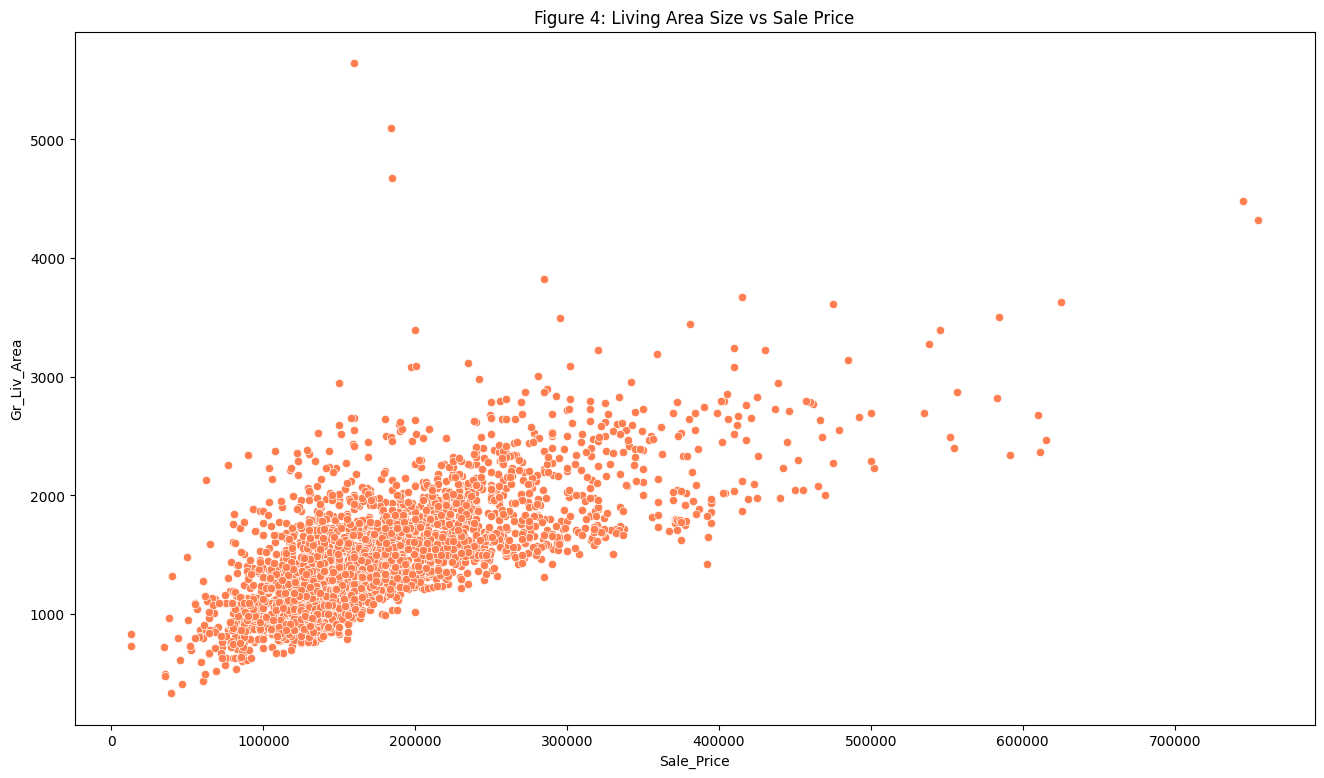

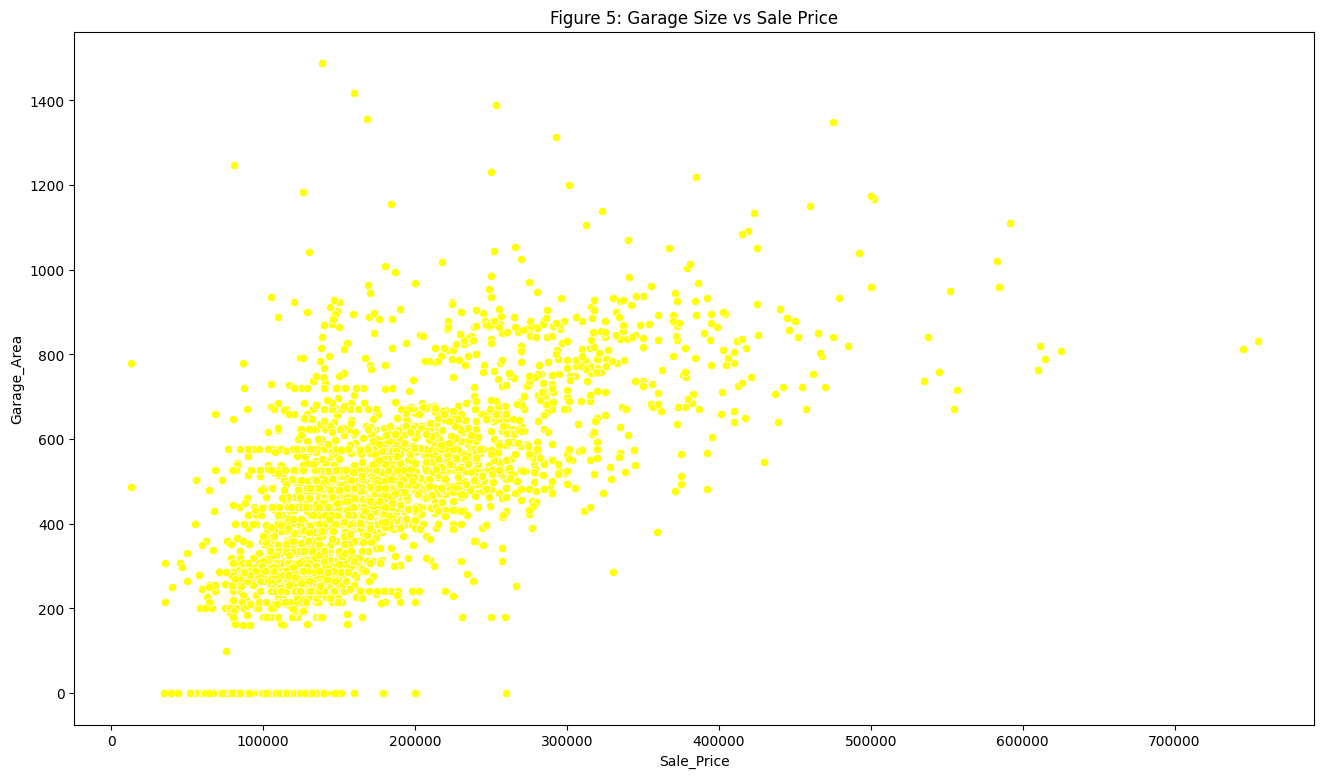

In [409]:
# Explore relationships between the independent and dependent variables
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x="Sale_Price", y="Gr_Liv_Area", color="coral")
plt.title("Figure 4: Living Area Size vs Sale Price")
plt.show()


plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x="Sale_Price", y="Garage_Area", color="yellow")
plt.title("Figure 5: Garage Size vs Sale Price")
plt.show()


Figure 4 shows a positive correlation between sales price of a house and the size of the living room.
Figure 5 illustartes there are a few houses that do not have garages which explains the 0 values for few of the houses. The relationship seems still to be positive in terms of the larger the garage are influences the house price to increase. The houses without garages are still going to be included in this model.

In [410]:
# Create a training and test set with a 75:25 split ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [411]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [412]:
# Print the model intercept and coefficients
print("Intercept: ", model.intercept_)
print("Coefficient; ", model.coef_)

Intercept:  -5059.448195610428
Coefficient;  [ 78.69286848 141.14571761]


In [ ]:
# Generate predictions for the test set

y_pred = model.predict(X_test)

# To predict house price (Used for testing)
new_house = pd.DataFrame([{"Gr_Liv_Area": 4000, "Garage_Area": 300}])
house_price = model.predict(new_house)[0]
print("Predicted price: $", house_price)

Predicted price: $ 352055.74101187737


In [414]:
# Evaluate the model
from sklearn.metrics import  mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MSE: ", mse)
print("RMSE: ", rmse)



MSE:  2634371879.6902103
RMSE:  51326.13252223676


The MSE is the squared differences between the actual and predicted sales price. While RMSE is the square root of MSE, in this case it is $ 51 326.14 , which is very high error when predicting the sales price of a house. It means there is an error of $ 51K +.

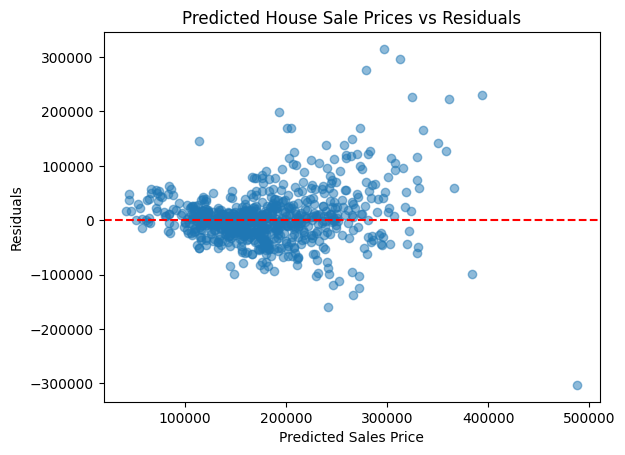

In [415]:
# Generate a plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Predicted House Sale Prices vs Residuals")
plt.xlabel("Predicted Sales Price")
plt.ylabel("Residuals")
plt.show()

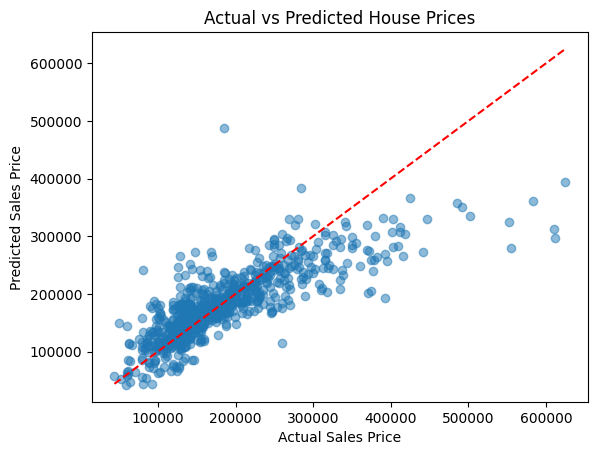

In [416]:
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Sales Price")
plt.ylabel("Predicted Sales Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

In [417]:
# Print the coefficients

coefficient = model.coef_
intercept = model.intercept_

print("Coefficient: ", coefficient)
print("Intercept: ", intercept)

Coefficient:  [ 78.69286848 141.14571761]
Intercept:  -5059.448195610428


**Interpret coefficients in the context of the prediction:**


A coefficient for Gr_Liv_Area 78.69286848 and 141.14571761. This means that for every additional square feet on Gr_Liv_Area will be an extra $ 78.69 on the house price and for every extra square feet on the Garage_Area will be and additional $ 141.15 on the sales price. The intercept of $ -5059.45 is the predicted sales price when the Gr_Area_Liv and Garage_Area is 0.

**Summarise findings**

In the correlation matrix it was very easy to determine strong and weak correlations between the variables. It was clear that the Gr_Liv_Area and Garage_Area had the strongest relationship with the Sales_Price (Dependent Variable).
From the exploratory analysis it was clear that the greater the square feet in Garage_Area and Gr_Liv_Area, the more expensive the house sales price.

In terms of evaluating the linear regression model, with the chosen features, the average error on predicting house prices are about $ 51K, which is significant. In order to fix this, more features would have to be included in the analysis, since house prices depends on more than the two features used in this analysis.